Data Fetch

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

import folium
from folium import plugins

In [2]:
!pip install geopandas
!pip install shapely
!pip install descartes

from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 95.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 85.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install itables
import itables

from itables.sample_dfs import get_countries
from itables import show

import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.8 MB/s eta 0:00:00


The data used in this work has been sourced from https://population.un.org/wpp/Download/Standard/MostUsed/
The objective if the study is to visualize and analyse the population, its density and relationship to life expectancy in the countries currently member of the European Union. The countries mentioned here https://worldpopulationreview.com/country-rankings/european-union-countries have been considered for the study.

The inspiration of the study comes from various directions, as we are aware Europe is not a resource risch continent, however the economic development draws people from all over the world, therefore, the rising population can become a concern in some decades. The economic development is not uniform across all members of the EU, this leads to certain demographic shifts.

In [4]:
DM=pd.read_excel("/content/demography.xlsx","Estimates")

This block is for getting only required data and removing all else.

In [5]:
EU_Countries=sorted(["Austria","France","Malta","Belgium","Germany","Netherlands","Bulgaria",
                      "Greece","Poland","Croatia","Hungary","Portugal","Cyprus","Ireland","Romania",
                      "Czechia","Italy","Slovakia","Denmark","Latvia","Slovenia","Estonia",
                      "Lithuania","Spain","Finland","Luxembourg","Sweden"])

In [6]:
DM.loc[:,"condition"]=DM[DM.columns[2]].apply(lambda x: True if x in EU_Countries else False)
DMC=DM.loc[DM.condition==True,[DM.columns[2],DM.columns[10],DM.columns[12],DM.columns[13],
                               DM.columns[14],DM.columns[15],DM.columns[34]]]

#Analysis

In [7]:
DMC[DMC.columns[0]].unique()

array(['Cyprus', 'Bulgaria', 'Czechia', 'Hungary', 'Poland', 'Romania',
       'Slovakia', 'Denmark', 'Estonia', 'Finland', 'Ireland', 'Latvia',
       'Lithuania', 'Sweden', 'Croatia', 'Greece', 'Italy', 'Malta',
       'Portugal', 'Slovenia', 'Spain', 'Austria', 'Belgium', 'France',
       'Germany', 'Luxembourg', 'Netherlands'], dtype=object)

In [8]:
DMC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1944 entries, 9220 to 14187
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Region, subregion, country or area *                      1944 non-null   object 
 1   Year                                                      1944 non-null   float64
 2   Total Population, as of 1 July (thousands)                1944 non-null   object 
 3   Male Population, as of 1 July (thousands)                 1944 non-null   object 
 4   Female Population, as of 1 July (thousands)               1944 non-null   object 
 5   Population Density, as of 1 July (persons per square km)  1944 non-null   object 
 6   Life Expectancy at Birth, both sexes (years)              1944 non-null   object 
dtypes: float64(1), object(6)
memory usage: 121.5+ KB


Violin Plot

The violin plot shows that over the years, EU members have enjoyed a healthy life expectancy of 70-75 years, with some regions silvery at 85 years. Some regions in earlier years recorded lows around 55, which can be attributed to epidemics and wars.

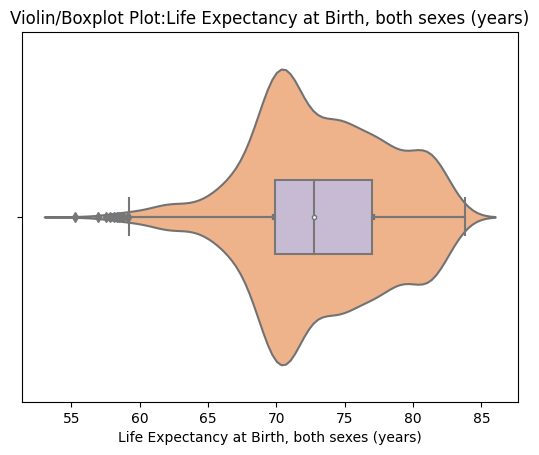

In [26]:
ax=sb.violinplot(x=DMC[DMC.columns[6]].astype('float'),color='xkcd:peach')
sb.boxplot(x=DMC[DMC.columns[6]].astype('float'),ax=ax,boxprops={'zorder':2},
           color='xkcd:lavender',width=0.2,saturation=0.3)
plt.title('Violin/Boxplot Plot:'+DMC.columns[6])
plt.show()

Histogram

The histogram shows that the population for most years and most EU members has been low, within 20,000,000 (20 million), some regions have had triple to quadraple this count.

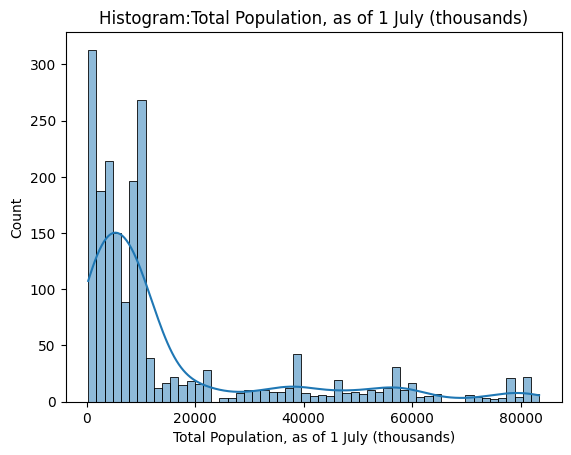

In [13]:
sb.histplot(x=DMC[DMC.columns[2]].astype('float'),kde=True)
plt.title('Histogram:'+DMC.columns[2])
plt.show()

Density Plot

The hexbin density plot correlating population and life expectancy in the year 2021 shows higher life expectancy in countries with lower population, which is intuitive, as government can make better investment towards quality of living and healthcare which serves fewer people. 

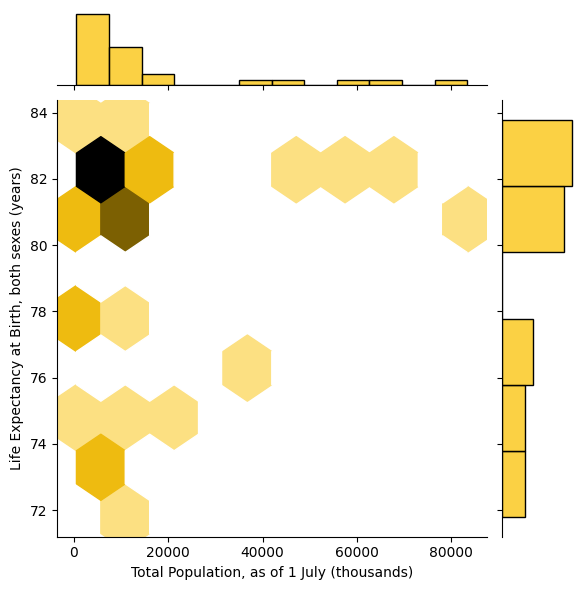

In [ ]:
year_condition=DMC.Year==2021
sb.jointplot(data=DMC.loc[year_condition,:],x=DMC.columns[2], y=DMC.columns[6], kind="hex",color='xkcd:goldenrod')
plt.show()

Trend lines

Non-uniform economic development across EU members leads to migration within the members. As human resources are the key to sustainable economic progress, as well as maintaining a suitable birth rate, the number of people (male and female) over the years has been presented as trend charts for each country.

In these countries, the rise in population is steady.

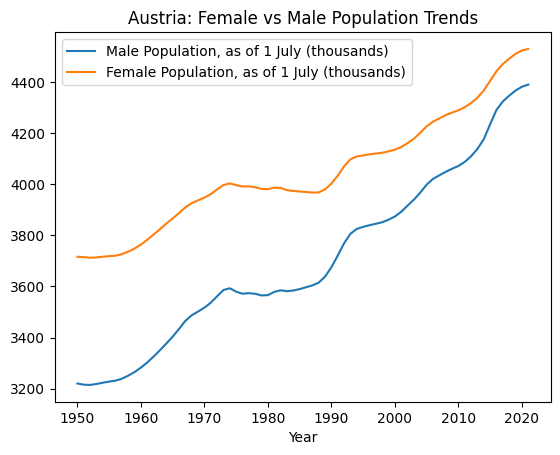

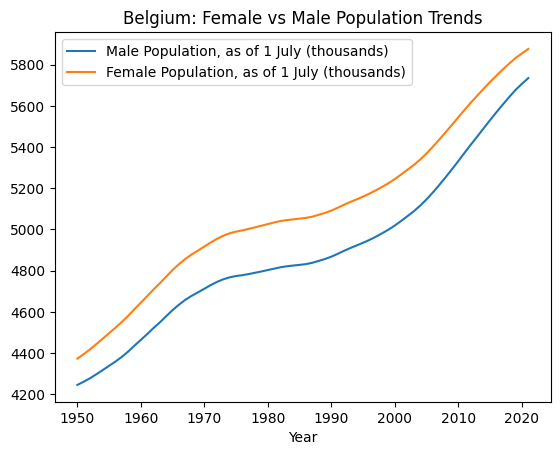

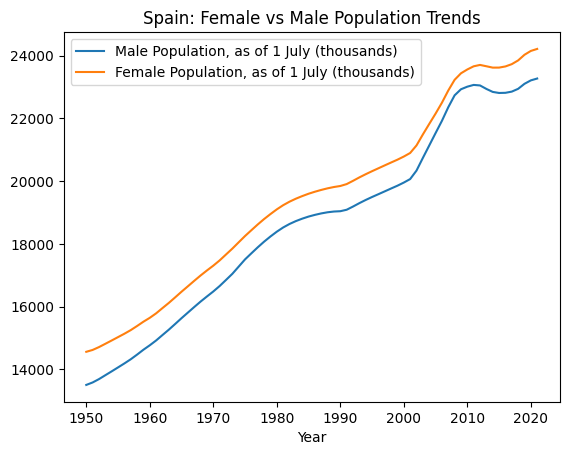

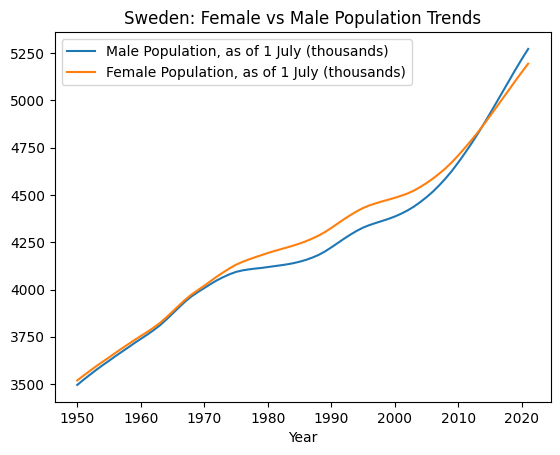

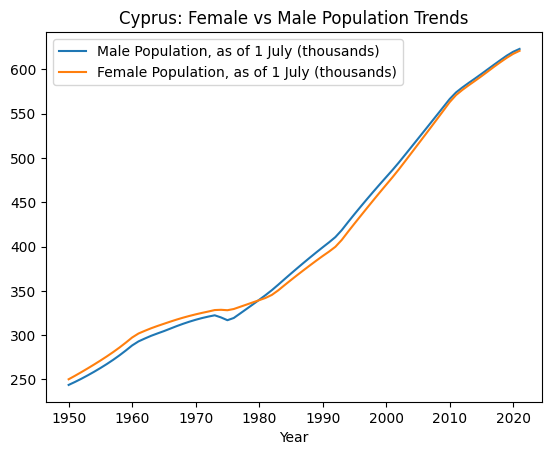

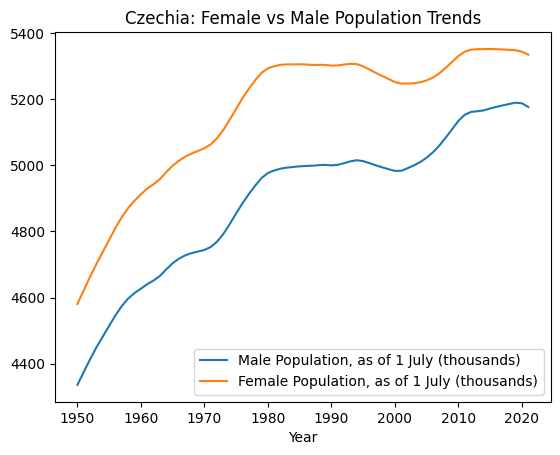

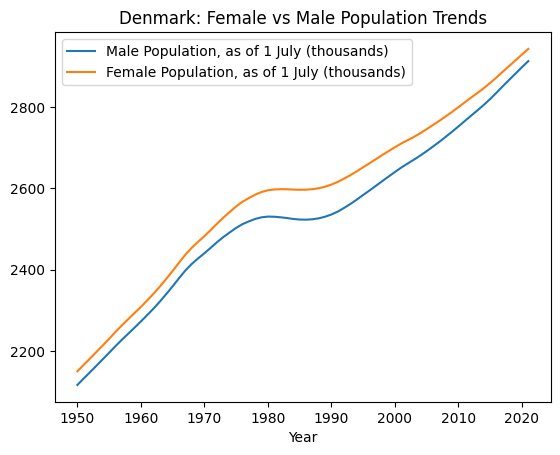

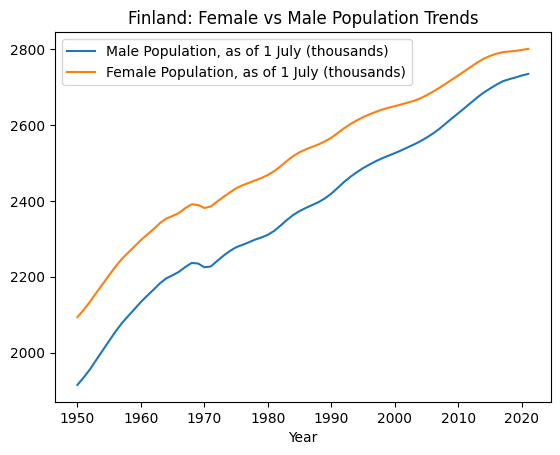

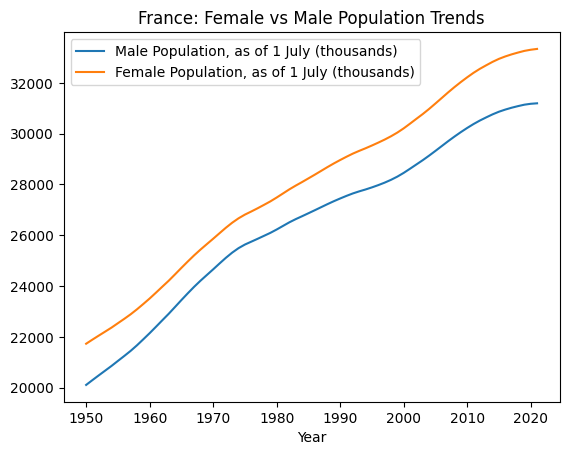

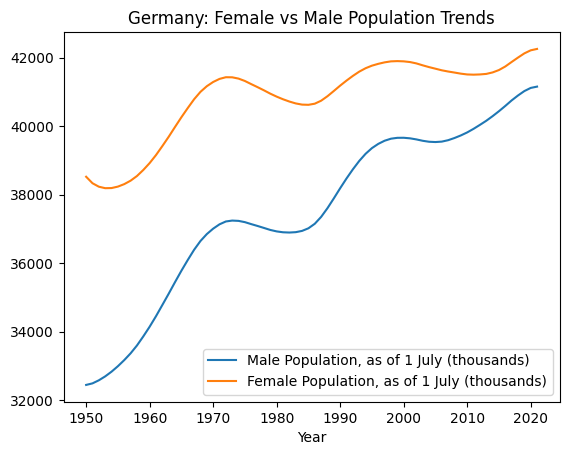

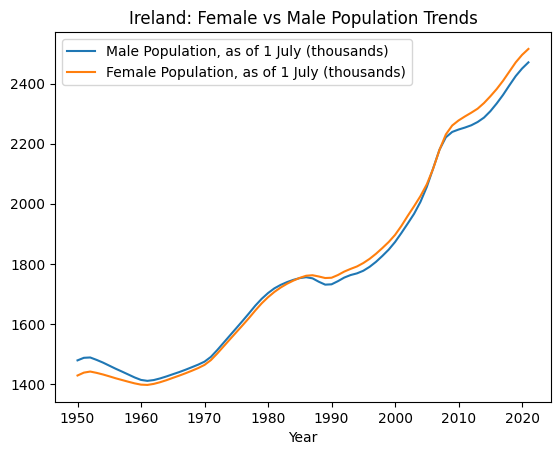

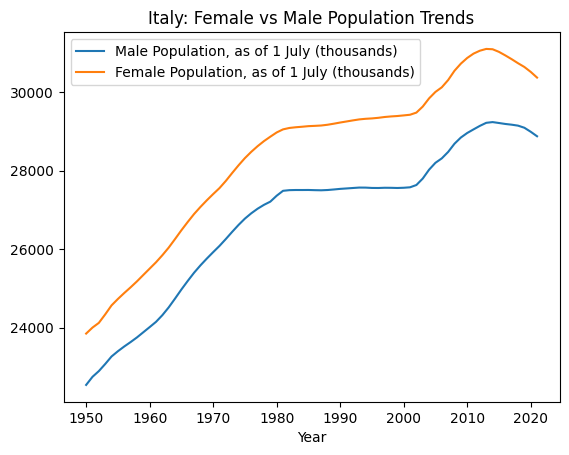

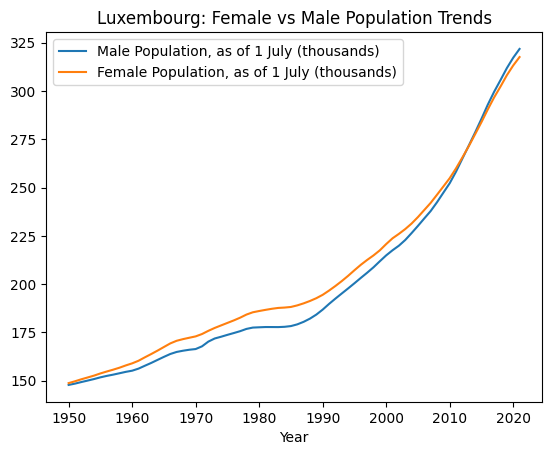

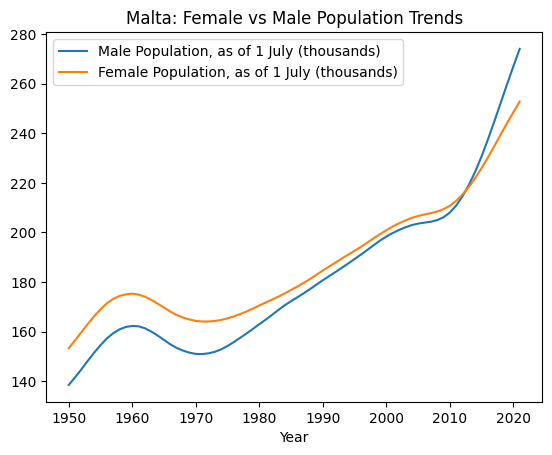

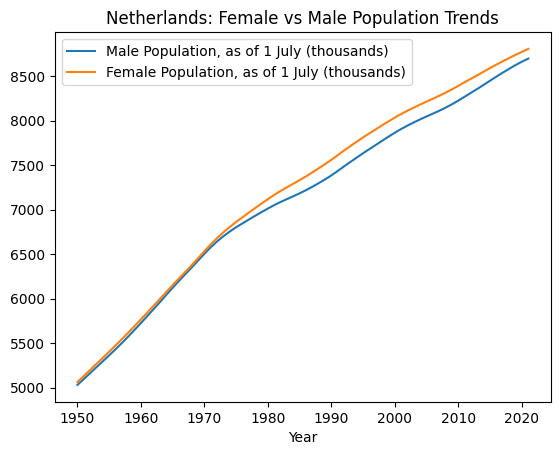

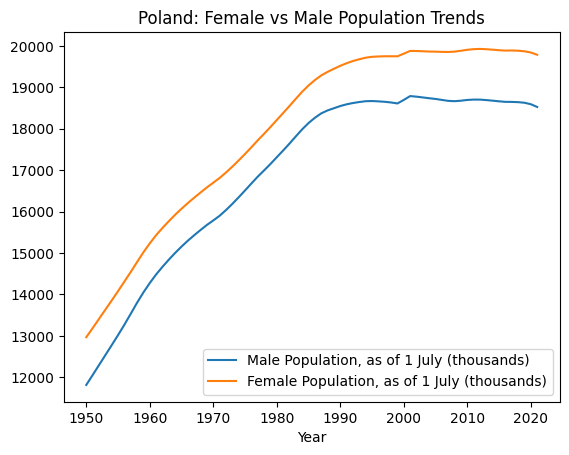

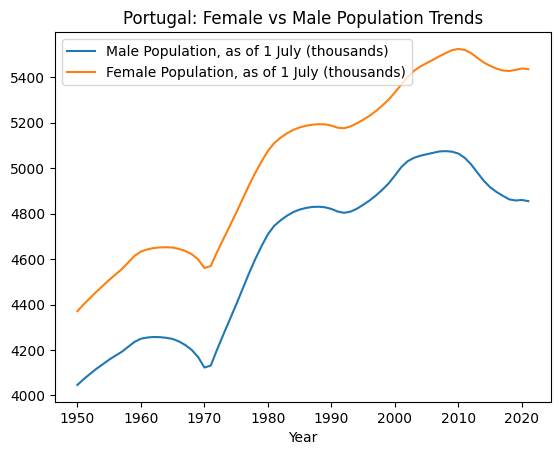

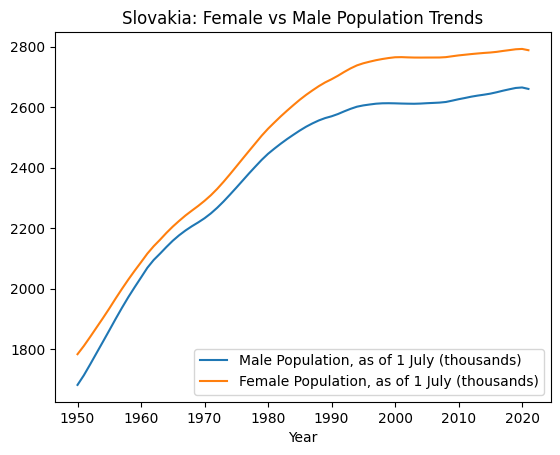

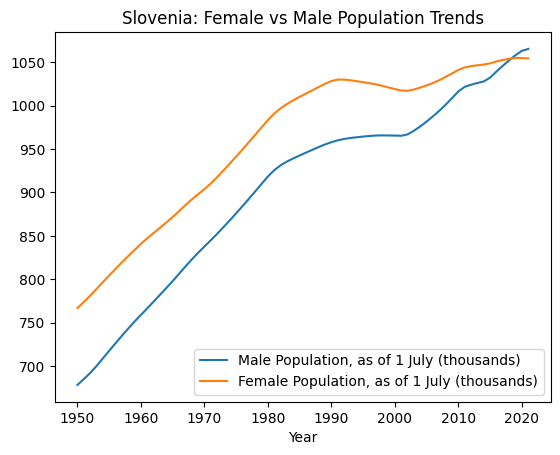

In [ ]:
region_condition=DMC[DMC.columns[0]]==EU_Countries[0]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[0]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[1]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[1]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[25]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[25]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[26]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[26]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[4]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[4]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[5]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[5]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[6]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[6]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[8]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[8]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[9]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[9]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[10]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[10]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[13]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[13]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[14]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[14]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[17]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[17]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[18]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[18]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[19]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[19]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[20]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[20]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[21]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[21]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[23]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[23]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[24]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[24]+': Female vs Male Population Trends')

plt.show()

In the following countries however, there has been an inverted U-shaped pattern, which indicates rapid migration, and consequent fall in the population, besides other factors.

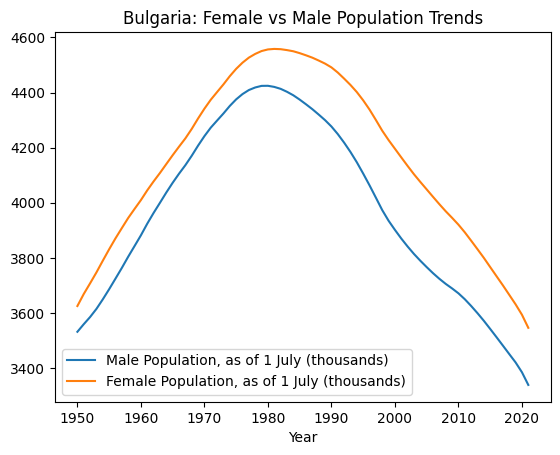

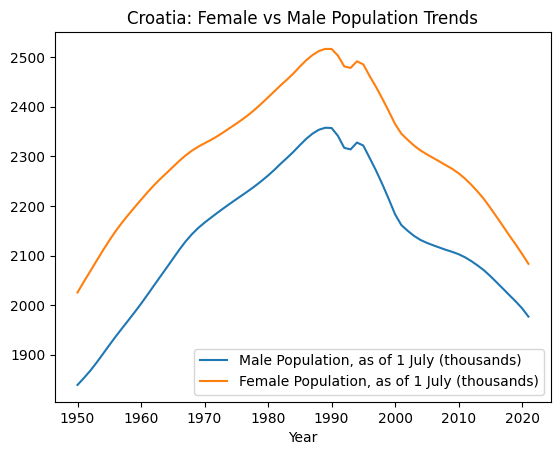

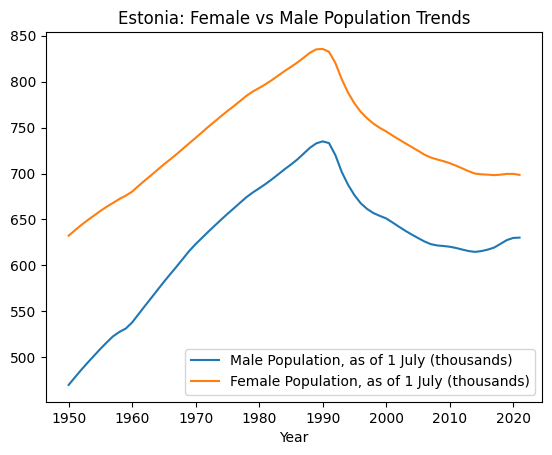

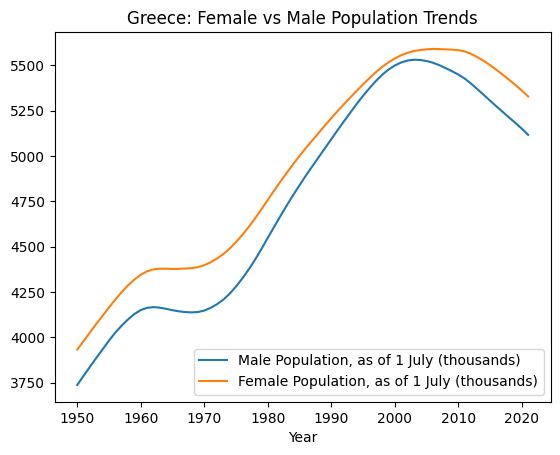

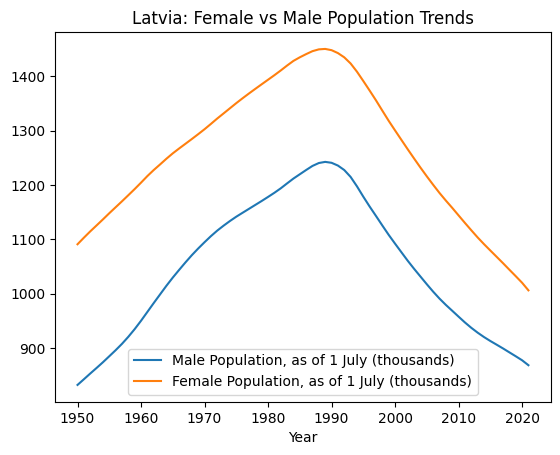

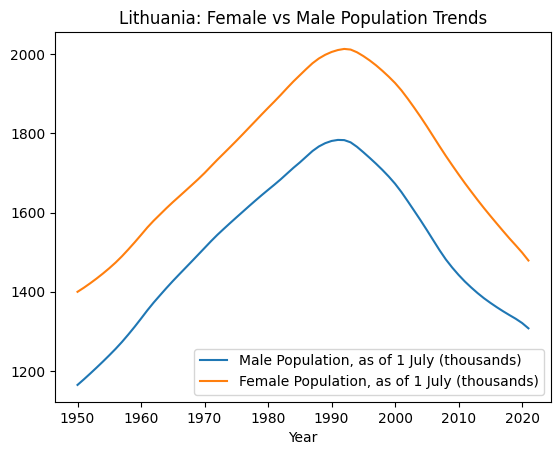

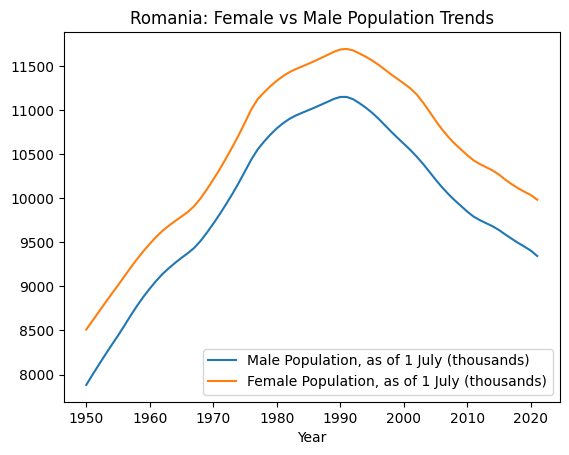

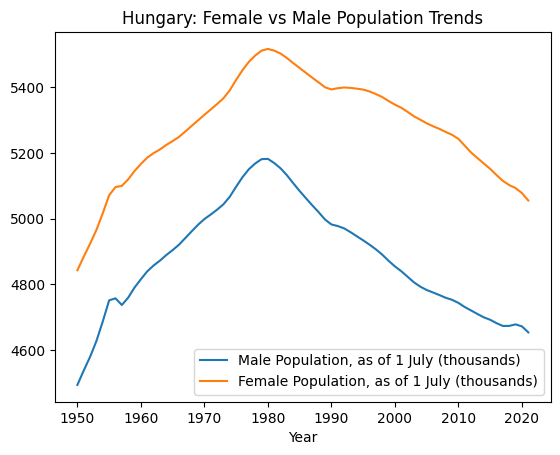

In [ ]:
region_condition=DMC[DMC.columns[0]]==EU_Countries[2]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[2]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[3]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[3]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[7]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[7]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[11]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[11]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[15]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[15]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[16]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[16]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[22]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[22]+': Female vs Male Population Trends')

region_condition=DMC[DMC.columns[0]]==EU_Countries[12]
DMC.loc[region_condition,[DMC.columns[1],DMC.columns[3],DMC.columns[4]]].plot(kind='line',x='Year')
plt.title(EU_Countries[12]+': Female vs Male Population Trends')

plt.show()

In [15]:
year_condition=DMC.Year==2021
Density_data=DMC.loc[year_condition,:].sort_values(by=DMC.columns[5],ascending=True).reset_index()

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=[DMC.columns[0],DMC.columns[2],DMC.columns[3],
                        DMC.columns[4],DMC.columns[5],DMC.columns[6]],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[Density_data[DMC.columns[0]], Density_data[DMC.columns[2]], 
                       Density_data[DMC.columns[3]],Density_data[DMC.columns[4]],
                       Density_data[DMC.columns[5]],Density_data[DMC.columns[6]]],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [16]:
df=get_countries(html=False).reset_index()
country_df = pd.merge(Density_data,df,how='inner',left_on=DMC.columns[0],right_on='country')
country_df["flag"] = [
    '<a href="https://flagpedia.net/{code}">'
    '<img src="https://flagpedia.net/data/flags/h80/{code}.webp" '
    'alt="Flag of {country}"></a>'.format(code=code.lower(), country=country)
    for code, country in zip(country_df['code'], country_df["country"])
]
country_df["country"] = [
    '<a href="https://en.wikipedia.org/wiki/{}">{}</a>'.format(country, country)
    for country in country_df["country"]
]
country_df["capital"] = [
    '<a href="https://en.wikipedia.org/wiki/{}">{}</a>'.format(capital, capital)
    for capital in country_df["capital"]
]

show(country_df[['Region, subregion, country or area *',
       'Total Population, as of 1 July (thousands)',
       'Population Density, as of 1 July (persons per square km)','flag']])

Chloropleth Visualization: red areas show countries with below average population density, those in green are above above average. As can be observed, southern regions tend to be densely populated, climatic factors can be a reason for this. The rest of the world is denoted by golden colour. 

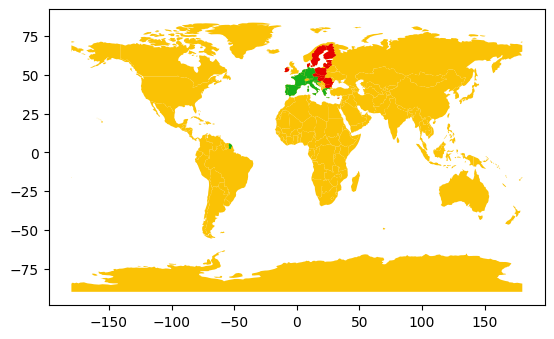

In [ ]:
base_map=gpd.read_file('/content/base_World_map.zip')
CM=pd.merge(Density_data,base_map,left_on=DMC.columns[0],right_on='ADMIN')
geodata=gpd.GeoDataFrame(data=CM['ADMIN'],geometry=CM.geometry)
F,ax=plt.subplots(1,1)
base_map.plot(ax=ax,color='xkcd:goldenrod')
geodata.plot(ax=ax,color=['xkcd:red' if value < Density_data['index'].mean() else 'xkcd:green' for value in Density_data['index'].tolist()])
plt.show()

Bubble Chart

The bubble chart visualizes the total population along x-axis, the name of the country in the y-axis and the density in the size of the bubble. Malta happens to be a high density country with low population, and Germany is a high population country with medium density. Most countries are low population - low density regions.

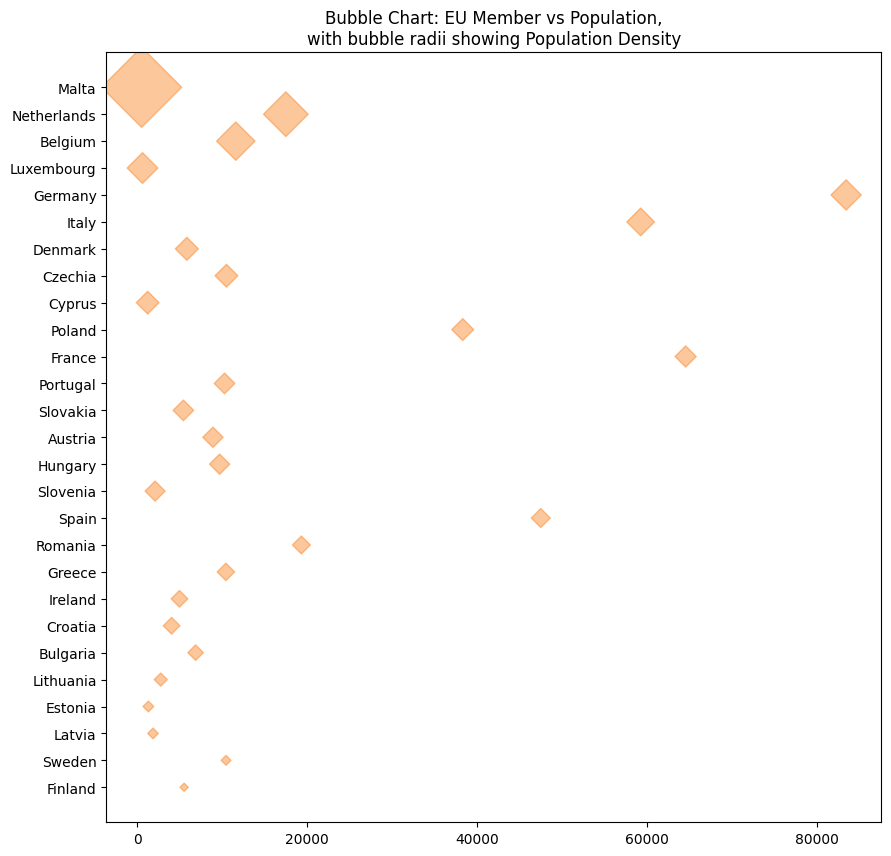

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y=Density_data[DMC.columns[0]].tolist(),
            x=Density_data[DMC.columns[2]].tolist(),
            s=Density_data[DMC.columns[5]].tolist(),
            alpha=0.4,
            c='xkcd:orange',
            marker='D')
plt.title('Bubble Chart: EU Member vs Population,\nwith bubble radii showing Population Density')
plt.show()

Continuous Scatterplot

Considering the proportion of females to the total population, almost all countries have a uniform proportion of 50% ang line up in the scatter plot.

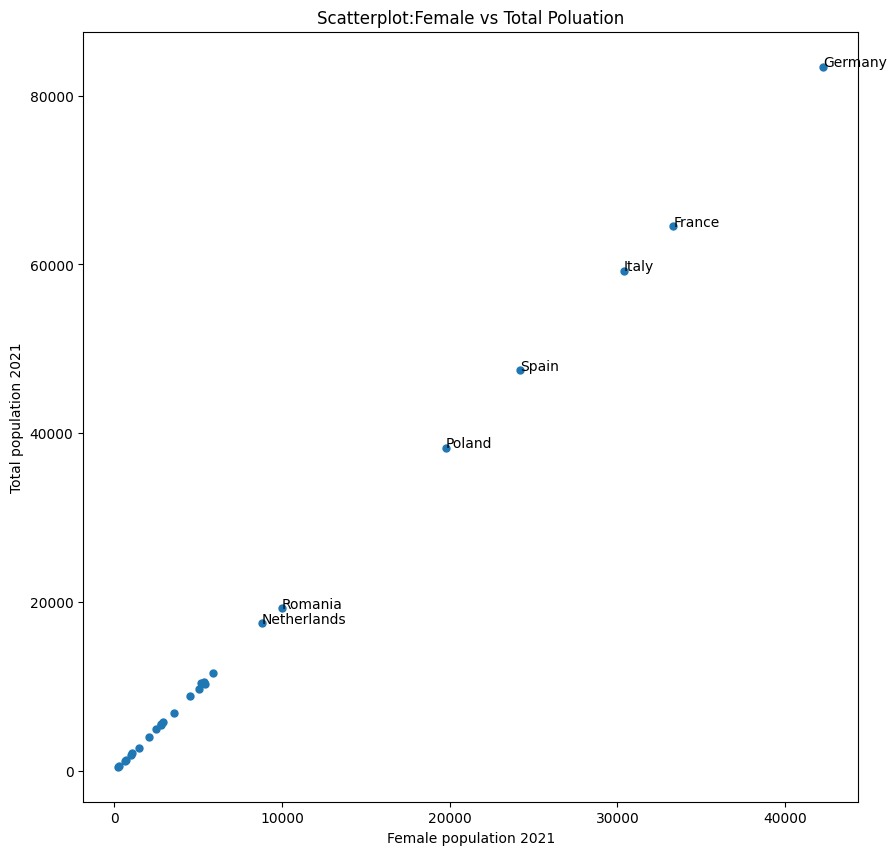

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=Density_data[DMC.columns[4]].tolist(),y=Density_data[DMC.columns[2]].tolist(),s=25)
for x,y,name in zip(Density_data[DMC.columns[4]].tolist(),
                    Density_data[DMC.columns[2]].tolist(),
                    Density_data[DMC.columns[0]].tolist()):
  if y>12000.:
    plt.text(x,y,name)
plt.xlabel('Female population 2021')
plt.ylabel('Total population 2021')
plt.title('Scatterplot:Female vs Total Poluation')
plt.show()

Interactive Map Visualization

The folium library has been employed to create an interactive map, with the capital cities showing the total population of each country on popup.

In [25]:
points=[[name,lat,lon,population] for name,lat,lon,population in zip(country_df['country'].tolist(),
                                                          country_df.latitude.tolist(),
                                                          country_df.longitude.tolist(),
                                                          country_df[DMC.columns[2]].tolist())]

m = folium.Map(location=[50,20], zoom_start=4)

for geopoint in points:
  text=geopoint[0]+':'+str(geopoint[3])
  popup = folium.Popup(f'<b>{text}</b>')
  folium.Circle(location=[geopoint[1], geopoint[2]],
                radius=float(geopoint[3])*2,
                color='crimson',
                fill=True,
                fill_color='crimson',
                popup=popup).add_to(m)
#plugins.MarkerCluster(country_df[['latitude', 'longitude']]).add_to(m)
m